In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

train = pd.read_csv("../Milestone-1/training-dataset-up-to-2019.csv", parse_dates=["Date"])

In [165]:
# Let's standardize the normal distribution of the temperature. This prevents multicollinearity problems.

# Subtracting the mean of the original distribution from each data point and then dividing by the standard deviation.

train['Temp'] = (train['Temp'] - train['Temp'].mean()) / train['Temp'].std()

In [166]:
# Build a squared (quadratic) temperature variable to put into a linear regression model in the coming steps

squared_temp = train['Temp'] * train['Temp']

<Axes: xlabel='MW', ylabel='Count'>

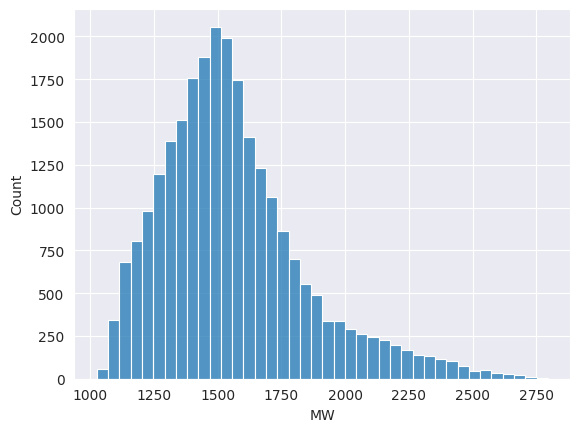

In [154]:
# Let's look at the distribution of y

%matplotlib inline

sns.histplot(
    train['MW'],
    bins=40
)

<Axes: xlabel='MW', ylabel='Count'>

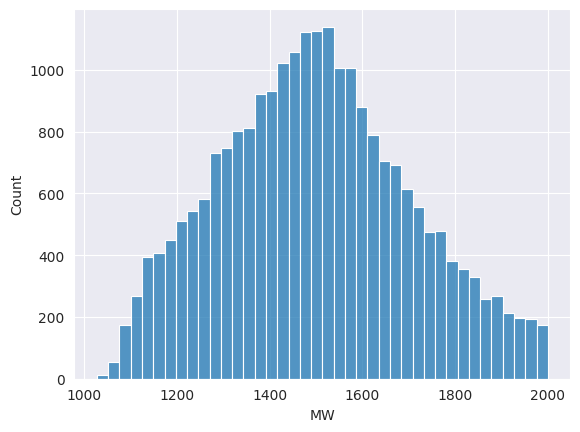

In [155]:
# Let's look at the distribution of y by zooming a bit

%matplotlib inline

sns.histplot(
    train['MW'][train['MW'] < 2000],
    bins=40
)

<Axes: xlabel='MW', ylabel='Count'>

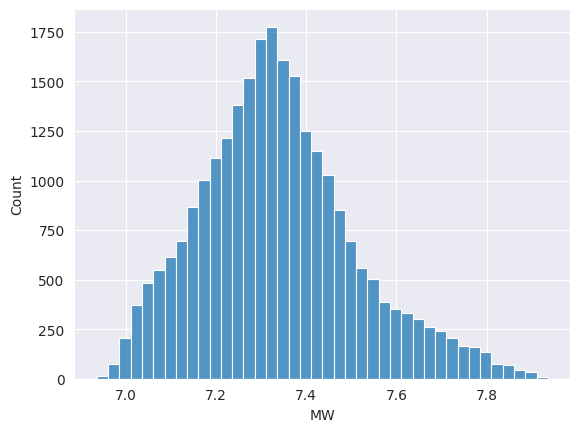

In [156]:
# Let's look at the distribution of y, while applying the log function

%matplotlib inline

sns.histplot(
    np.log1p(train['MW']),
    bins=40
)

In [167]:
# Build an ordinary least squares (OLS) linear regression model to predict energy using hour, day, month, and temperature squared)

results = sm.OLS.from_formula(
    'MW ~ Temp + C(hour) + C(day) + C(month) + C(weekday)', 
    data=train
).fit().summary()

print(results)

# Notice the coefficient of determination (R-squared)

                            OLS Regression Results                            
Dep. Variable:                     MW   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     573.4
Date:                Fri, 15 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:52:45   Log-Likelihood:            -1.6853e+05
No. Observations:               25536   AIC:                         3.372e+05
Df Residuals:                   25464   BIC:                         3.378e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1460.4099     10.223    1

In [ ]:
# Plot the scatterplot between energy and temperature (as in the previous section), but only for the months of January and July.

In [ ]:
# Plot the scatterplot between energy and temperature, but only for the hours of midnight and noon. 

In [168]:
# Let's add the interaction between temperature/time of day and temperature/month of year to our model.

results = sm.OLS.from_formula(
    'MW ~ Temp + Temp * C(hour) + C(day) + Temp * C(month) + C(weekday)', 
    data=train
).fit().summary()

print(results)

# Notice how the coefficient of determination increased (R-squared)

                            OLS Regression Results                            
Dep. Variable:                     MW   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1733.
Date:                Fri, 15 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:52:58   Log-Likelihood:            -1.5393e+05
No. Observations:               25536   AIC:                         3.081e+05
Df Residuals:                   25430   BIC:                         3.089e+05
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1203.8460    

In [ ]:
# Calculate the predictions (or fitted values) from the final linear regression model.

In [ ]:
# Calculate the MAPE for these predictions from your training dataset.